### Import the data set

In [1]:
import warnings
warnings.filterwarnings('ignore' )

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("D1_data.csv")
df.head()

,Date,Power
0,1/1/2020,259.196071
1,1/2/2020,280.923954
2,1/3/2020,231.064502
3,1/4/2020,147.105333
4,1/5/2020,296.006479


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [4]:
df.head()

,Power
Date,
2020-01-01,259.196071
2020-01-02,280.923954
2020-01-03,231.064502
2020-01-04,147.105333
2020-01-05,296.006479


<AxesSubplot:xlabel='Date'>

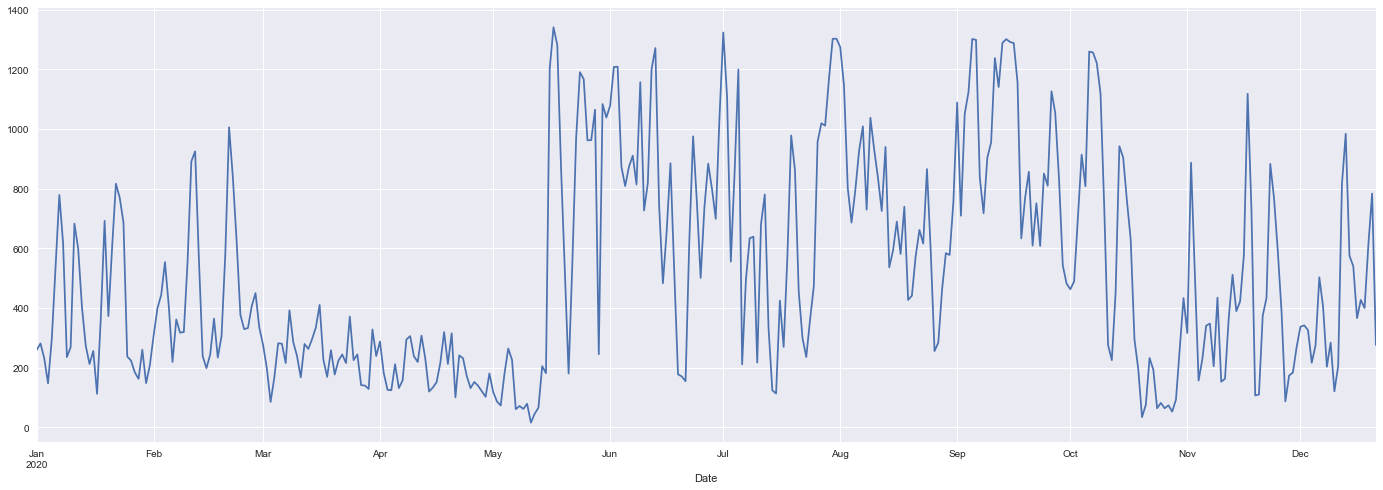

In [5]:
df['Power'].plot(figsize=(24,8))

### Testing for stationary_ADF Test

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
test_result=adfuller(df['Power'])

In [8]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Power):
    result=adfuller(Power)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [9]:
adfuller_test(df['Power'])

ADF Test Statistic : -2.603240027503088
p-value : 0.0923294669885178
#Lags Used : 9
Number of Observations Used : 346
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


So, need to do differencing part.

### Figure out order of the ARIMA Model 

In [10]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['Power'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4819.664, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4864.818, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4866.690, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4866.586, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4862.818, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4817.963, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4833.231, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4827.287, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4819.632, Time=0.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4818.855, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4817.805, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4850.021, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4819.709, Time=1.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4845.210, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  356
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2403.905
Date:                Fri, 03 Feb 2023   AIC                           4815.810
Time:                        04:09:52   BIC                           4831.299
Sample:                    01-01-2020   HQIC                          4821.972
                         - 12-21-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7310      0.049     14.780      0.000       0.634       0.828
ar.L2         -0.2033      0.051     -3.988      0.000      -0.303      -0.103
ma.L1         -0.8760      0.035    -24.744      0.000      -0.945      -0.807
sigma2       4.45e+04   2287.344     19.456      0.000       4e+04     4.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               145.64
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Start to fit the model 

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore' )

#### Split data into Training and Testing

In [12]:
print(df.shape)
train=df.iloc[:300]
test=df.iloc[300:]
print(train.shape,test.shape)

(356, 1)
(300, 1) (56, 1)


#### Train the model

In [13]:
model=ARIMA(train['Power'],order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Power   No. Observations:                  300
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2023.630
Date:                Fri, 03 Feb 2023   AIC                           4055.260
Time:                        04:09:53   BIC                           4070.062
Sample:                    01-01-2020   HQIC                          4061.184
                         - 10-26-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7389      0.056     13.187      0.000       0.629       0.849
ar.L2         -0.1839      0.057     -3.231      0.001      -0.296      -0.072
ma.L1         -0.8696      0.044    -19.715      0.000      -0.956      -0.783
sigma2      4.419e+04   2432.069     18.168      0.000    3.94e+04     4.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               154.15
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.13   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot residual errors 

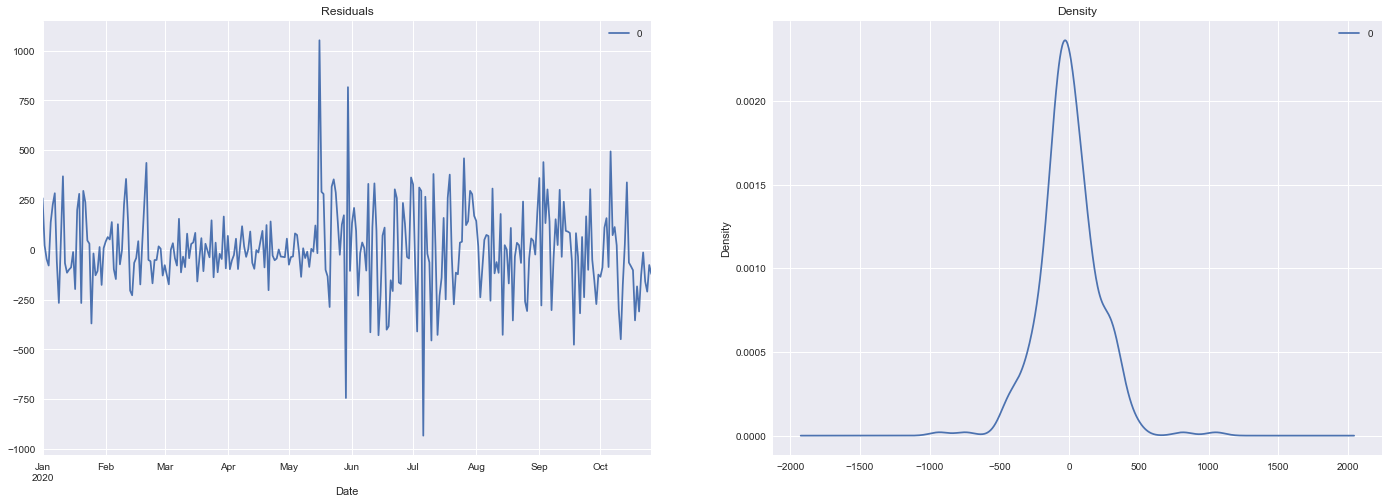

In [14]:
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0],figsize=(24,8))
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

### Make prediction on Test Set 

In [15]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,dynamic=False,typ='level')

pred.index=df.index[start:end+1]
print(pred)

Date
2020-10-27    152.502420
2020-10-28    221.590753
2020-10-29    256.260622
2020-10-30    269.168714
2020-10-31    272.328838
2020-11-01    272.289429
2020-11-02    271.679046
2020-11-03    271.235309
2020-11-04    271.019724
2020-11-05    270.942057
2020-11-06    270.924327
2020-11-07    270.925513
2020-11-08    270.929650
2020-11-09    270.932489
2020-11-10    270.933826
2020-11-11    270.934291
2020-11-12    270.934389
2020-11-13    270.934376
2020-11-14    270.934348
2020-11-15    270.934330
2020-11-16    270.934322
2020-11-17    270.934319
2020-11-18    270.934318
2020-11-19    270.934318
2020-11-20    270.934319
2020-11-21    270.934319
2020-11-22    270.934319
2020-11-23    270.934319
2020-11-24    270.934319
2020-11-25    270.934319
2020-11-26    270.934319
2020-11-27    270.934319
2020-11-28    270.934319
2020-11-29    270.934319
2020-11-30    270.934319
2020-12-01    270.934319
2020-12-02    270.934319
2020-12-03    270.934319
2020-12-04    270.934319
2020-12-05    270.93

<AxesSubplot:title={'center':'Actuals vs Predicted'}, xlabel='Date'>

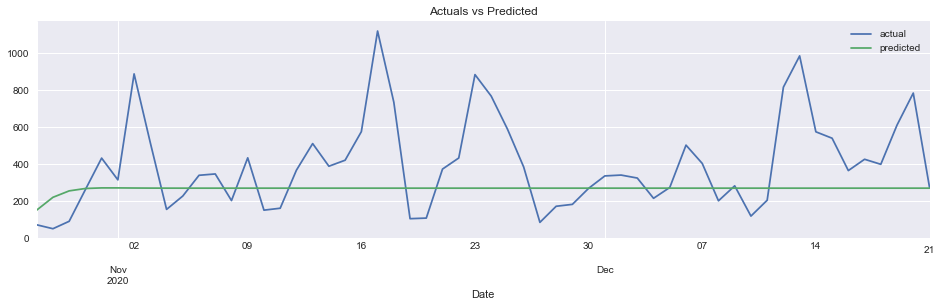

In [16]:
# Actual vs Fitted Plot
actual = test.Power
pd.DataFrame({"actual": actual, "predicted": pred}).plot(
    title="Actuals vs Predicted", figsize=(16, 4)
)

In [17]:
pred.to_csv('sample.csv', sep=';')

In [18]:
test['Power'].mean()

395.1873139116072

In ARIMA,
Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.

### Retrain the model on entire data set

In [ ]:
model2=ARIMA(df['Power'],order=(2,1,1))
model2=model2.fit()
df.tail()

### For future dates 

In [ ]:
pred2=model2.predict(starts=len(df),end=len(df)+30,typ='levels').rename('ARIMA Prediction')
print(pred2)